# `WORKERS SALARY PREDICTION MODEL`<br>
`by ADEDARA ADEMOLA`

In [32]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pickle

In [33]:
# load the dataset
data = pd.read_csv('Salary Data.csv')
# check the first few rows of the dataset
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [34]:
# drop missing values
data = data.dropna()

In [35]:
# check for duplicate values
data.duplicated().sum()

np.int64(49)

In [36]:
# drop duplicate values
data = data.drop_duplicates()

##  `Eploratoty Data Analysis(EDA)`
THIS IS A CRUCIAL STEP IN DATA PREPARATION

In [37]:
# Stat info
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
Years of Experience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [38]:
# do a value counts on categorical features
data.value_counts(subset=data['Gender'])

Gender
Male      170
Female    154
Name: count, dtype: int64

In [39]:
# do a value counts on categorical features
data.value_counts(subset=data['Job Title'])

Job Title
Director of Operations                9
Director of Marketing                 8
Senior Marketing Manager              8
Senior Project Manager                7
Senior Business Analyst               6
                                     ..
Junior Designer                       1
Junior Data Scientist                 1
Junior Data Analyst                   1
Junior Customer Support Specialist    1
Web Developer                         1
Name: count, Length: 174, dtype: int64

In [40]:
# do a value counts on categorical features
data.value_counts(subset=data['Education Level'])

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_15916\2069901047.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.barplot(x='Education Level', y= 'Salary', data=data, color= 'pink',hue= 'Education Level')


<Axes: xlabel='Education Level', ylabel='Salary'>

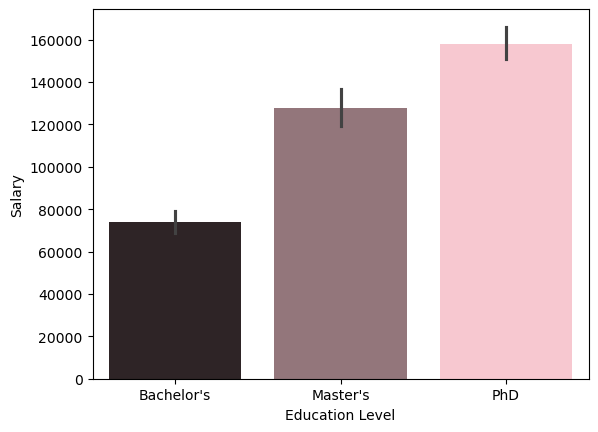

In [41]:
# plot visuals against salary
sns.barplot(x='Education Level', y= 'Salary', data=data, color= 'pink',hue= 'Education Level')

C:\Users\USER\AppData\Local\Temp\ipykernel_15916\1698944980.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.barplot(x='Gender', y= 'Salary', data=data, color= 'yellow',hue= 'Education Level')


<Axes: xlabel='Gender', ylabel='Salary'>

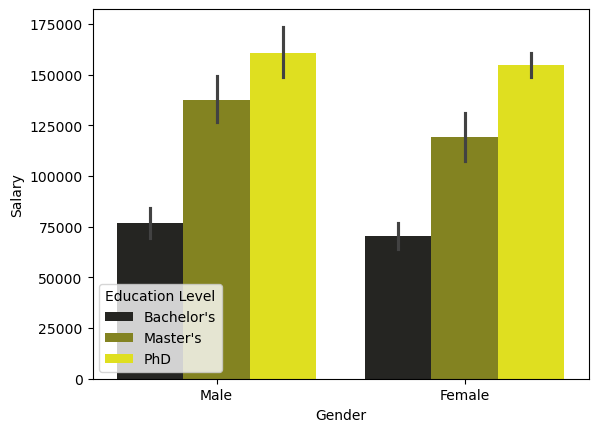

In [42]:
# plot visuals against salary
sns.barplot(x='Gender', y= 'Salary', data=data, color= 'yellow',hue= 'Education Level')

<Axes: xlabel='Job Title', ylabel='Salary'>

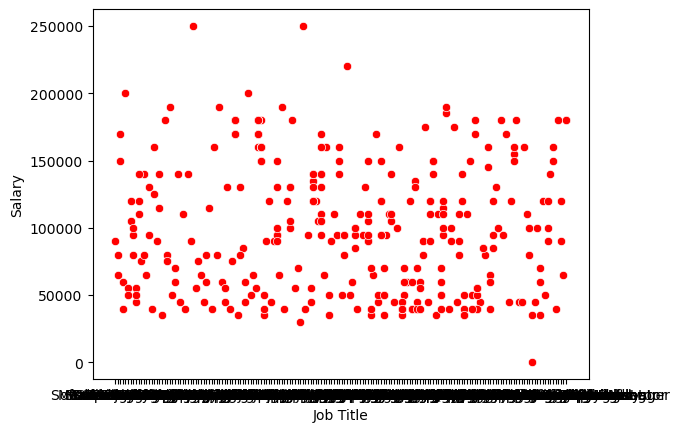

In [43]:
# plot visuals against salary
sns.scatterplot(x='Job Title', y= 'Salary', data= data, color= 'red')

<Axes: xlabel='Years of Experience', ylabel='Salary'>

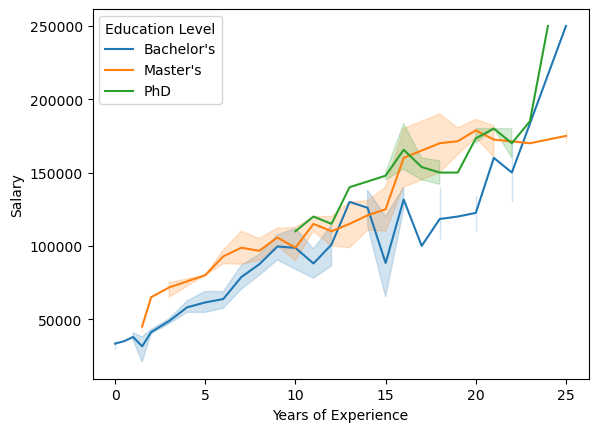

In [44]:
# plot visuals against salary
sns.lineplot (x='Years of Experience', y= 'Salary', data= data, color= 'red', hue= 'Education Level') 
            

<Axes: xlabel='Age', ylabel='Salary'>

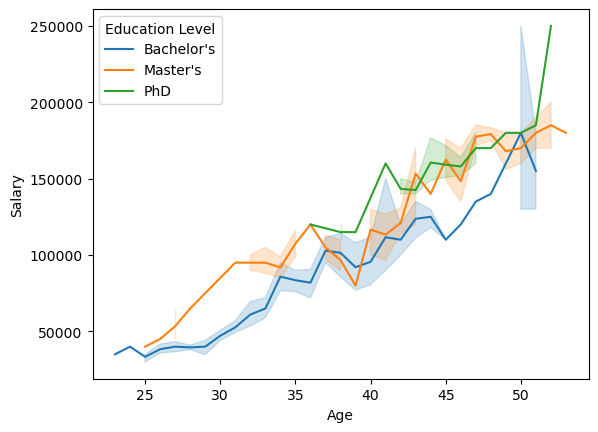

In [45]:
# plot visuals against salary
sns.lineplot (x='Age', y= 'Salary', data= data, color= 'red', hue= 'Education Level') 

In [46]:
# drop unwanted columns
data.drop(columns=['Gender', 'Job Title'], inplace=True)

In [47]:
# check new data
data.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


## `FEATURE ENGINEERING`

In [48]:
# copy data with a new variable name
data2 = data.copy()
# check data
data2.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


In [49]:
# map education levels to numerical values
education_mapping = {
    "Bachelor's" : 1,
    "Master's" : 2,
    "PhD" : 3
}
# apply the mapping to data and create a new column
data['Education Level'] = data['Education Level'].map(education_mapping)
# check data
data.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,1,5.0,90000.0
1,28.0,2,3.0,65000.0
2,45.0,3,15.0,150000.0
3,36.0,1,7.0,60000.0
4,52.0,2,20.0,200000.0


<Axes: >

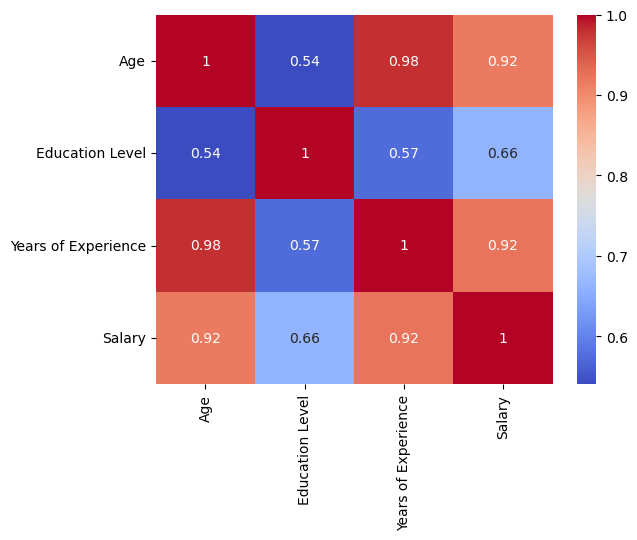

In [50]:
# perform feature engineering on the dataset with correlation 
# check correlation
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

In [51]:
# select independent and dependent variable
y = data2['Salary'].values # target var
X = data2[["Age","Education Level","Years of Experience"]]


## `SPLIT THE DATASET`

In [52]:
# split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# print shapes
print ("x_train", x_train.shape, "x_test", x_test.shape)
print ("y_train", y_train.shape, "y_test", y_test.shape)

x_train (259, 3) x_test (65, 3)
y_train (259,) y_test (65,)


## `CHOOSE THE MODEL`

In [53]:
# import the model
from sklearn.linear_model import LinearRegression
# run the model
Lr = LinearRegression()
# check
Lr

LinearRegression()

In [54]:
# fit the model into a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
# specify the pipeline with OneHotEncoder and LinearRegression
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore' , sparse_output=False), LinearRegression())

In [55]:
# fit the data into the pipeline
# teach the model to learn
pipeline.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('linearregression', LinearRegression())])

In [56]:
# make predictions on the test set
y_pred = pipeline.predict(x_test)
# check y_pred
y_pred

array([115533.22764564, 129465.67837662,  52654.42437077, 128153.91284571,
       118478.1662859 , 118478.1662859 ,  48900.20923556,  61979.83856552,
       168719.96450031,  42271.5954918 ,  40926.15002794, 123466.40936684,
       118478.1662859 , 170757.33646169,  92211.31296937, 175294.80532189,
        85519.44453136,  91696.69229249,  47410.22238507,  40926.15002794,
        86496.40555096,  59773.18450839,  61979.83856552,  35000.        ,
       295124.4778574 , 100145.67556023, 145580.1683883 , 173281.4558074 ,
       185125.13212163,  38679.04307064, 108626.3591553 , 169762.32919499,
        94774.48437374, 142511.87745139, 143253.38041985,  48222.60589074,
        89489.06636177,  94013.60954584, 105841.64678722,  30531.40006084,
        95459.2181973 ,  48430.06079117,  96187.98640938,  60801.05267609,
        40671.46431446,  48900.20923556, 133725.23907398,  41691.30272056,
       158925.18532269, 100145.67556023, 138051.911477  ,  40671.46431446,
        53124.57281516,  

In [57]:
# evaluate the model
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)*100
mae = mean_absolute_error(y_test,y_pred)
print(f"Test Mean Squared Error:" ,(mse))
print(f"Test R^2 Score:" , (r2))
print(f"Test Mean Absolute Error:" , (mae))


Test Mean Squared Error: 447413533.14574283
Test R^2 Score: 76.32465789274315
Test Mean Absolute Error: 12196.877225973802


In [58]:
# test the model with new set of data
pipeline.predict([[45,"PhD", 15]])

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([145580.1683883])

In [59]:
# test the model with new set of data
pipeline.predict([[20,"Bachelor's", 5]])

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([77036.74024899])

In [60]:
# save the model to a file
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file) 